In [1]:
from django.shortcuts import render,get_object_or_404
from django.http import HttpResponse
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from keras.preprocessing.image import img_to_array
import time
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
import requests
import tensorflow
from keras.models import load_model

Using TensorFlow backend.


In [4]:
BASE_DIR = "N:/RiceDetectionGithub/RiceDiseaseDtection_bdFarmer/Django Server/img_process"


sJson = BASE_DIR + "/diseasedetect-e39f6-6d1ebab30232.json"
print(sJson)

# Fetch the service account key JSON file contents
cred = credentials.Certificate(sJson)
# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://diseasedetect-e39f6.firebaseio.com/'
})

ff = "Root level"
print(ff)

#Keras Model
print("Loading Modedl")

model = load_model("N:/RiceDetectionGithub/tfModels/model1.h5")
graph = tensorflow.get_default_graph()
print("MODEL-LOADED")

Last_id = -1
print("Last id = %d" % Last_id)

N:/RiceDetectionGithub/RiceDiseaseDtection_bdFarmer/Django Server/img_process/diseasedetect-e39f6-6d1ebab30232.json
Root level
Loading Modedl
MODEL-LOADED
Last id = -1


In [5]:
CATEGORIES = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust',
	 'Apple___healthy','Blueberry___healthy',
	 'Cherry_(including_sour)___Powdery_mildew',
	 'Cherry_(including_sour)___healthy',
	 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
	 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight',
	 'Corn_(maize)___healthy', 'Grape___Black_rot',
	 'Grape___Esca_(Black_Measles)',
	 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
	 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
	 'Peach___healthy', 'Pepper,_bell___Bacterial_spot',
	 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
	 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
	 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
	 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
	 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
	 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
	 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
	 'Tomato___healthy']

In [62]:
readDir = 'N:/Rice Detection/PlantVillage CrodAi-Labeled/TestPicturesColor/Apple___Apple_scab/'
writeDir = BASE_DIR + '/Image Resources/'

readImage = readDir + '0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG'

#Download and saving image

# timestr = time.strftime("%Y%m%d-%H%M%S")
# write_url = writeDir +timestr+ '.jpg'
# f = open(write_url,'wb')
# f.write(requests.get(image_url).content)
# f.close()

#Import in opencv 
img = cv2.imread(readImage)
a = img.shape
print(a)

# hue sat value -hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#Thresholding Segment using hsv
lower_green = np.array([0,48,0])	#lower value 
upper_green = np.array([255,255,255])	#upper value

mask = cv2.inRange(hsv, lower_green, upper_green)
res = cv2.bitwise_and(img,img, mask= mask)



write_Orginal = writeDir + 'orginal.jpg'
write_mask = writeDir + 'mask.jpg'
write_segmented = writeDir + 'segmented.jpg' 
cv2.imwrite(write_Orginal,img)
cv2.imwrite(write_mask,mask)
cv2.imwrite(write_segmented,res)




IMG_SIZE = 256
img_array = cv2.imread(write_Orginal) 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #RESIZE MAGES
img_array = img_to_array(new_array)


#Normalizing image numpy array
np_image_test = np.array(img_array, dtype=np.float16) / 225.0

#Expand dimension to predict the model in keras
np_image_test = np.expand_dims(np_image_test, axis=0)


global graph
with graph.as_default():
    #Predict image
    print("prediction called")
    a = model.predict(np_image_test)
    print(a)

#     pred_list = a[0]*100
    pred_list = np.around(a, decimals=3)
    print(pred_list)

    a = model.predict_classes(np_image_test)

    result = CATEGORIES[int(a)]
    prediction_result = 'Image prediction - '+ result

    print(prediction_result)
    print(a)

(256, 256, 3)
prediction called
[[4.00666788e-04 1.22836440e-07 1.24983270e-11 2.68276409e-07
  1.95531182e-08 1.82098558e-10 8.02850693e-08 1.04619096e-06
  2.42678061e-06 7.83243886e-11 3.07583221e-08 4.88080021e-10
  7.30625738e-09 4.42463184e-11 8.45317913e-12 4.06006097e-11
  1.97723149e-09 1.88660820e-09 3.12606107e-06 3.43278543e-08
  8.63266469e-04 1.21043421e-12 5.75634651e-09 1.02024034e-13
  1.30693380e-07 3.95647585e-05 2.52531684e-09 1.15189469e-10
  1.54418985e-13 1.08598242e-09 1.39468692e-09 9.60978852e-10
  2.40494611e-08 1.07484832e-09 7.77705544e-09 2.26349243e-14
  1.40150558e-09 9.98689115e-01]]
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.001 0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.999]]
Image prediction - Tomato___healthy
[37]


In [63]:
import numpy as np
import matplotlib.pyplot as plt


In [64]:
# y_pos = np.arange(len(CATEGORIES))
# plt.bar(y_pos, a, align='center', alpha=0.5)
# plt.xticks(y_pos, CATEGORIES)
# plt.ylabel('Usage')
# plt.title('Programming language usage')
# plt.show()

In [65]:
 p = pred_list[0].tolist()

In [68]:
p

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0010000000474974513,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9990000128746033]

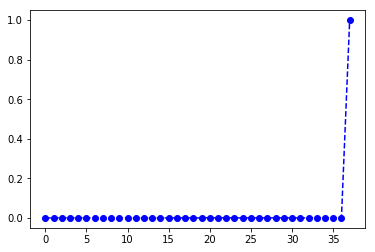

In [69]:
plt.plot(p,linestyle='--', marker='o', color='b')

<BarContainer object of 38 artists>

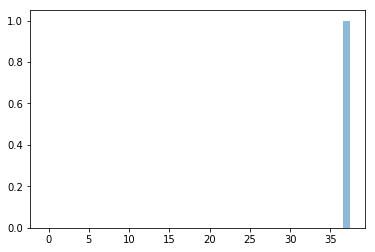

In [70]:
plt.bar(y_pos,p,align='center', alpha=0.5)
